# Cross validation

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

Rozważmy następujący zbiór punktów:

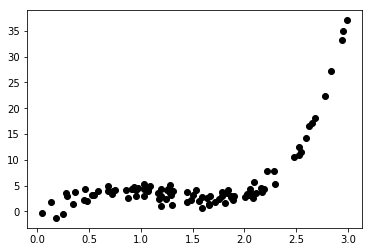

In [92]:
np.random.seed(123)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)
plt.plot(x, y, 'ok');
plt.show()

## k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 6
- regrsji wielomianowej stopnia 7

In [93]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR7', make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression()) ))

In [94]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)
#scoring = 'neg_mean_absolute_error'
scoring = 'r2'

In [95]:
results = []
names = []
print("Srednia (odchylenie standardowe) r2:")
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Srednia (odchylenie standardowe) r2:
LR: 0.178209 (0.449345)
PR2: 0.561019 (0.376536)
PR3: 0.953244 (0.034413)
PR4: 0.970032 (0.016401)
PR5: 0.970956 (0.015685)
PR6: 0.969393 (0.016523)
PR7: 0.969276 (0.016648)


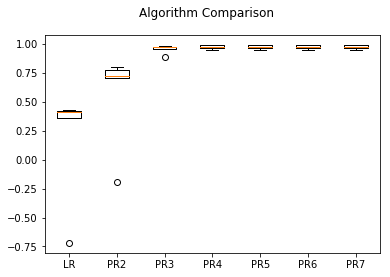

In [96]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt>. 

In [97]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [98]:
print(grid.best_params_)
print(grid.best_score_)

{'polynomialfeatures__degree': 5}
0.970956293225


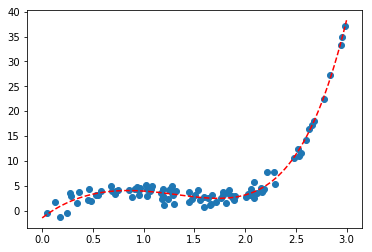

In [100]:
x_tr=np.linspace(0,3,100)
plt.scatter(x,y)
plt.plot(x_tr,grid.predict(x_tr[:,np.newaxis]),'r--')
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [101]:
import pandas as pd
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']

In [102]:
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)

In [103]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(X, y)
grid.best_params_

{'polynomialfeatures__degree': 3}

In [104]:
grid.best_score_

0.98676665975328315

In [105]:
df_adv["sales_pred"] = grid.predict(X)

In [106]:
df_adv.head(10)

,TV,radio,newspaper,sales,sales_pred
1,230.1,37.8,69.2,22.1,21.251124
2,44.5,39.3,45.1,10.4,10.769447
3,17.2,45.9,69.3,9.3,8.596825
4,151.5,41.3,58.5,18.5,18.597224
5,180.8,10.8,58.4,12.9,12.925583
6,8.7,48.9,75.0,7.2,7.778653
7,57.5,32.8,23.5,11.8,11.186445
8,120.2,19.6,11.6,13.2,13.181462
9,8.6,2.1,1.0,4.8,4.798200
10,199.8,2.6,21.2,10.6,11.132179
